---
title: "Data Cleaning"
format:
    html:
        code-fold: true
execute:
    echo: true      # Show the code (to fold it)
    eval: true      # Run the code cells during render
    output: true    # Ensure outputs are included
---



## Introduction

Data cleaning is the next step in processing data into actionable insights. Data cleaning involves removing NaNs, removing outliers, renaming columns, and applying transformations. Without performing such actions, we would not be able to draw any conclusions from our data as we will be analyzing inconsistent and incompatible data. My goal for data cleaning was to make sure my data had consistent, easy to read column names and row values, consistently formatted data, and standardization.

### Standardization

Standardizaiton, also known as Z-Score Normalization is needed when a distribution is going to be used in a K-Means clustering, PCA, or , as it minimizes the amount of bias larger features get. Z-Score Standardization alters the data set so each variable will have a mean of 0, and a standard deviation of 1. This is done by subtracting the mean by every data point, and dividing by the standard deviation. After this process, data is ready to be further analyzed in clustering and dimensional reduction. 

$$z = \frac{x - \mu}{\sigma}$$
 
##  Data Cleaning: Census Data 

After obtaining the data for census_df, it was time to clean. The first thing I did was check for NA values, and found there were none. Next, I chose to perform column mapping on my dataset, as the current columns were code names such as K202801_004E and were confusing to understand. After cleaning the column names, the next step in data cleaning was to fix the state column. Currently this held the state FIPS identifier, with 1 for Alabama, 2 for Alaska, etc. I chose to map each FIPS code to the state name for easier identification and interpretability. 

In [1]:
import pandas as pd

census_df = pd.read_csv('../../data/raw-data/census_raw_data.csv') 


In [2]:
column_mapping = {
    "K200101_001E": "Total_Population",
    "K200201_002E": "White",
    "K200201_003E": "African_American",
    "K200201_005E": "Asian",
    "K200201_004E": "American_Indian_and_Alaska_Native",
    "K200201_006E": "Native_Hawaiian_and_Pacific_Islander",
    "K202101_002E": "Veterans",
    "K202101_006E": "Nonveterans",
    "K201701_002E": "Below_Poverty_Level",
    "K201902_001E": "Median_Household_Income",
    "K201501_004E": "High_School_Graduate",
    "K201501_007E": "Bachelors_Degree_or_Higher",
    "K202801_002E": "Households_with_Computers",
    "K202801_004E": "Households_with_Internet",
    "K200103_001E": "Median_Age",
    "NAME": "District_Name", 
    "congressional district": "Congressional_District"
}

census_df.rename(columns=column_mapping, inplace=True)

fips_to_state = {
    1: "Alabama",
    2: "Alaska",
    4: "Arizona",
    5: "Arkansas",
    6: "California",
    8: "Colorado",
    9: "Connecticut",
    10: "Delaware",
    11: "District of Columbia",
    12: "Florida",
    13: "Georgia",
    15: "Hawaii",
    16: "Idaho",
    17: "Illinois",
    18: "Indiana",
    19: "Iowa",
    20: "Kansas",
    21: "Kentucky",
    22: "Louisiana",
    23: "Maine",
    24: "Maryland",
    25: "Massachusetts",
    26: "Michigan",
    27: "Minnesota",
    28: "Mississippi",
    29: "Missouri",
    30: "Montana",
    31: "Nebraska",
    32: "Nevada",
    33: "New Hampshire",
    34: "New Jersey",
    35: "New Mexico",
    36: "New York",
    37: "North Carolina",
    38: "North Dakota",
    39: "Ohio",
    40: "Oklahoma",
    41: "Oregon",
    42: "Pennsylvania",
    44: "Rhode Island",
    45: "South Carolina",
    46: "South Dakota",
    47: "Tennessee",
    48: "Texas",
    49: "Utah",
    50: "Vermont",
    51: "Virginia",
    53: "Washington",
    54: "West Virginia",
    55: "Wisconsin",
    56: "Wyoming",
    60: "American Samoa",
    66: "Guam",
    69: "Northern Mariana Islands",
    72: "Puerto Rico",
    78: "Virgin Islands"
}
# Assuming your dataset has a 'FIPS' column
census_df['state'] = census_df['state'].map(fips_to_state)

# Drop specific columns by name
columns_to_drop = ['District_Name']  
census_df = census_df.drop(columns=columns_to_drop)

## Census DataFrame First 5 Rows

In [3]:
print(census_df.head())

   Total_Population  African_American   White  Asian  Veterans  Nonveterans  \
0            715346            196891  479949  10627     51744       499929   
1            708409            183949  490987  13049     51572       500213   
2            725634            130913  539903  12215     55771       510612   
3            686297             51171  591084   3072     39104       491300   
4            660468            416885  221541   5007     33737       481571   

   Below_Poverty_Level  Median_Household_Income  High_School_Graduate  \
0               118962                    46445                163604   
1               124289                    45832                150206   
2                91640                    57174                135017   
3               119113                    45387                158561   
4               156399                    37123                146697   

   Bachelors_Degree_or_Higher  Households_with_Computers  \
0                       79

## Checking for NAs

In [4]:
census_df.isna().sum()

Total_Population                        0
African_American                        0
White                                   0
Asian                                   0
Veterans                                0
Nonveterans                             0
Below_Poverty_Level                     0
Median_Household_Income                 0
High_School_Graduate                    0
Bachelors_Degree_or_Higher              0
Households_with_Computers               0
Households_with_Internet                0
American_Indian_and_Alaska_Native       0
Native_Hawaiian_and_Pacific_Islander    0
Median_Age                              0
state                                   0
Congressional_District                  0
dtype: int64

## Column Names

In [5]:
print(census_df.columns)

Index(['Total_Population', 'African_American', 'White', 'Asian', 'Veterans',
       'Nonveterans', 'Below_Poverty_Level', 'Median_Household_Income',
       'High_School_Graduate', 'Bachelors_Degree_or_Higher',
       'Households_with_Computers', 'Households_with_Internet',
       'American_Indian_and_Alaska_Native',
       'Native_Hawaiian_and_Pacific_Islander', 'Median_Age', 'state',
       'Congressional_District'],
      dtype='object')


# Data Cleaning: Voting Data

Similar to the Census Data, I first wanted to clean up the columns and check if there were any NA values. Due to the heading and split columns names in the raw data, the data was very messy and needed to be cleaned before any other data cleaning could be done. I first renamed the columns from the excel sheet for better understanding.

In [6]:
vote_df = pd.read_excel('../../data/raw-data/Votes2018.xlsx', skiprows=3)



vote_df.columns = [
    "line_number",
    "state_abbreviation",
    "state",
    "Congressional_District",
    "votes_cast",
    "citizen_voting_age_population_estimate",
    "citizen_voting_age_population_moe",
    "voting_rate_estimate",
    "voting_rate_moe"
]

/Users/iphone10/miniconda3/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


## Voting DataFrame First 5 Rows

In [7]:
vote_df.head()

,line_number,state_abbreviation,state,Congressional_District,votes_cast,citizen_voting_age_population_estimate,citizen_voting_age_population_moe,voting_rate_estimate,voting_rate_moe
0,1,AL,Alabama,1,242617.0,544464.0,3424.0,44.560706,0.280231
1,2,AL,Alabama,2,226230.0,516295.0,5674.0,43.817972,0.481553
2,3,AL,Alabama,3,231915.0,543854.0,4099.0,42.642878,0.321397
3,4,AL,Alabama,4,230969.0,515701.0,4678.0,44.787386,0.406273
4,5,AL,Alabama,5,260673.0,551968.0,2121.0,47.226107,0.181472


## Checking for NAs

In [8]:

vote_df.isna().sum()


line_number                                4
state_abbreviation                        11
state                                     11
Congressional_District                    11
votes_cast                                11
citizen_voting_age_population_estimate    11
citizen_voting_age_population_moe         11
voting_rate_estimate                      11
voting_rate_moe                           11
dtype: int64

In [9]:
rows_with_na = vote_df[vote_df.isna().any(axis=1)]

# Display rows with NA values
print((rows_with_na).head())

                                           line_number state_abbreviation  \
436                                                NaN                NaN   
437                                                NaN                NaN   
438                                             Notes:                NaN   
439  - Congressional districts 10, 14, 21, and 24 i...                NaN   
440  1 Votes as collected by state election offices...                NaN   

    state Congressional_District  votes_cast  \
436   NaN                    NaN         NaN   
437   NaN                    NaN         NaN   
438   NaN                    NaN         NaN   
439   NaN                    NaN         NaN   
440   NaN                    NaN         NaN   

     citizen_voting_age_population_estimate  \
436                                     NaN   
437                                     NaN   
438                                     NaN   
439                                     NaN   
440          

The **NA values** in the data are due to metadata:  

- "**Florida**: Congressional districts **10, 14, 21, and 24** did not report vote totals because state law prohibits unopposed candidates from appearing on the ballot." (U.S. Census Bureau) 
- "**North Carolina**: District **9** did not report vote totals due to a new election ordered by the state’s Board of Elections in **February 2019**." ( U.S. Census Bureau)

 *(Source: U.S. Census Bureau)*  

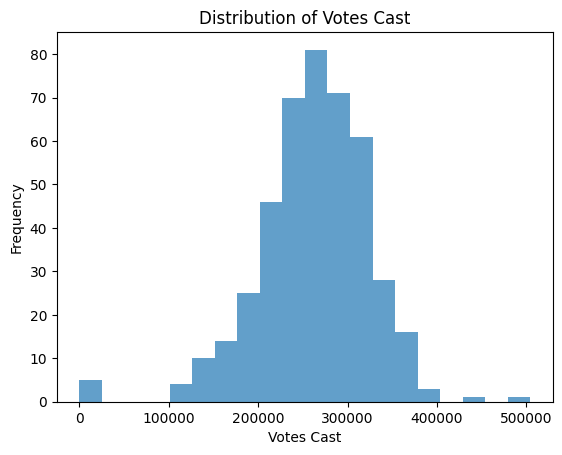

In [10]:
import matplotlib.pyplot as plt

# Remove rows where 'votes_cast' is NaN
vote_df = vote_df[vote_df['votes_cast'].notna()]

# Ensure there are valid values to plot

vote_df['votes_cast'].plot(kind='hist', bins=20, alpha=0.7)
plt.title("Distribution of Votes Cast")
plt.xlabel("Votes Cast")
plt.ylabel("Frequency")
plt.show()


When plotting the data to check for outliers, there showed 5 districts where zero votes were cast. 

This is what the metadata had stated, with districts 10, 14, 21, and 24 in Florida and district 9 in North Carolina not reporting votes. 

## Handling Missing Values

![](./images/messed_up.png)



In the process of cleaing, I noticed that states that only contained 1 Congressional District were labeled as “At-large” as opposed to 1, 2, etc, as seen with Delaware and District of Columbia . I utilized code to convert these into ‘1’ for data homogeneity. 



## Handling Outliers

Similar to the **census_data**, I believed that removing outliers could result in the loss of valuable insights. However, I felt it was necessary to **examine the distribution** of features that I believe are key contributors to **Voting Rate**.

I also decided to **drop the columns**:  
- `"line_number"`  
- `"citizen_voting_age_population_moe"`  
- `"voting_rate_moe"`  

These columns were removed as they may interfere with further analysis down the road.  

## Visual

### Distribution of Household Income


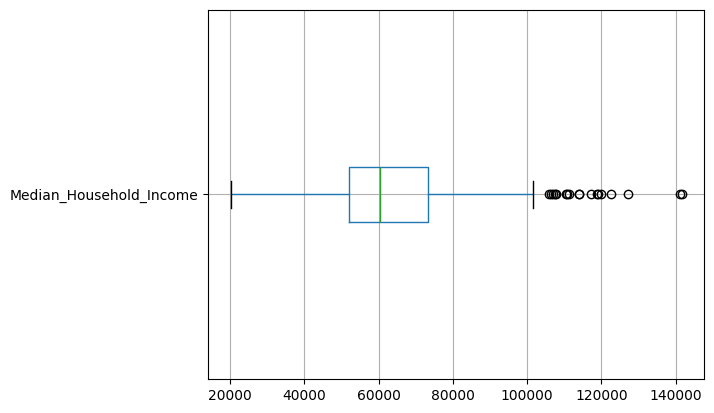

In [11]:
import matplotlib.pyplot as plt
census_df.boxplot(column='Median_Household_Income', vert=False)
plt.show()

### Distribution of White

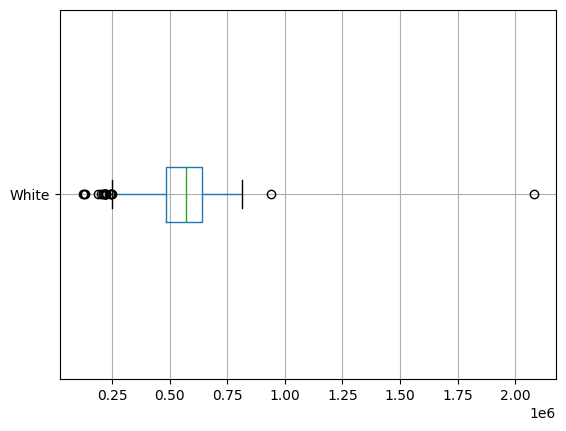

In [12]:
import matplotlib.pyplot as plt
census_df.boxplot(column='White', vert=False)
plt.show()

### Distribution of Poverty Level

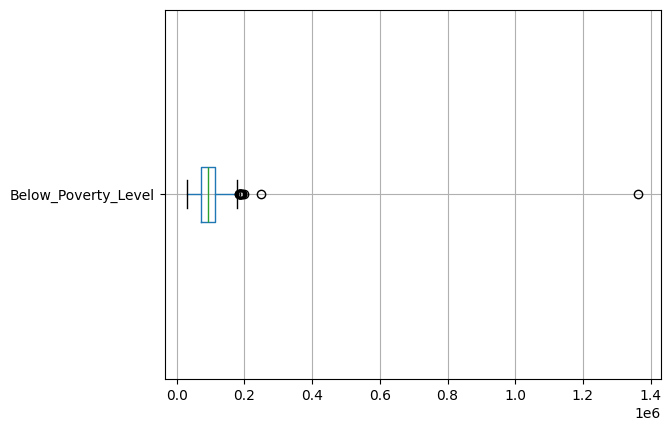

In [13]:
import matplotlib.pyplot as plt
census_df.boxplot(column='Below_Poverty_Level', vert=False)
plt.show()

### Distribution of African American

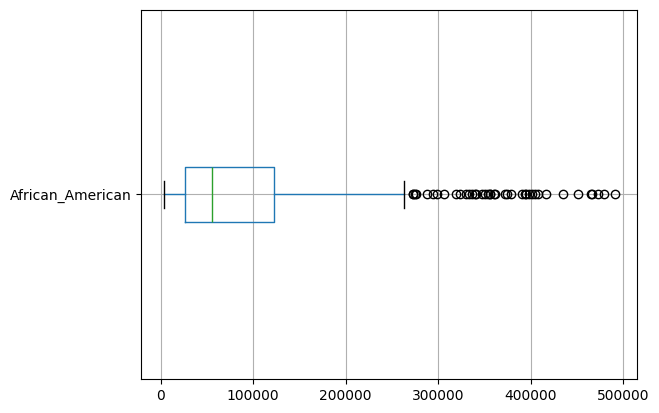

In [14]:
import matplotlib.pyplot as plt
census_df.boxplot(column='African_American', vert=False)
plt.show()

 After exploring the data through plots and statistics, I realized that although there were some variables that were skewed, it was not in best practice to completely omit them, as this could be a key indicator of voter turnout (Urban vs rural, socioeconomic standing, small districts vs big districts). 

## Standardization

 I chose to use standardization instead of omitting outliers to prepare data for further analysis. I made a copy of the original data frame to maintain for testing and comparison, and then called StandardScalar from SKLearn to fit the numeric values of the dataset. After doing so, the mean of every variable is 0, with a standard deviation of 1.

 In the Census Dataframe, I chose all columns that were numerical values. In the Votes Data frame, I chose all numerical values as well, including voting rate. Even though voting_rate already on a standardized scale (out of 100), to maintain data homogeneity and not let algorithms treat them differently I chose it was best to standardize this variable as well.

In [15]:
from sklearn.preprocessing import StandardScaler

# Define columns to standardize
columns_to_standardize = ['votes_cast', 'citizen_voting_age_population_estimate', 'voting_rate_estimate']

# Select numerical columns for standardization
numerical_cols = ['Total_Population', 'African_American', 'White', 'Asian', 'Veterans', 
                  'Nonveterans', 'Below_Poverty_Level', 'High_School_Graduate', 
                  "Bachelors_Degree_or_Higher", "Households_with_Computers",
                  "Households_with_Internet", "American_Indian_and_Alaska_Native", 
                  "Native_Hawaiian_and_Pacific_Islander", "Median_Household_Income", "Median_Age"]

# Make a copy of census_df
census_standard_df = census_df.copy()

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the numerical columns
census_standard_df[numerical_cols] = scaler.fit_transform(census_standard_df[numerical_cols])

# Check the first few rows to confirm scaling
print(census_standard_df.head())

# Initialize StandardScaler for vote_df
scaler = StandardScaler()

vote_standard_df = vote_df.copy()

vote_standard_df[columns_to_standardize] = scaler.fit_transform(vote_standard_df[columns_to_standardize])

   Total_Population  African_American     White     Asian  Veterans  \
0         -0.314384          0.970773 -0.432776 -0.601424  0.673281   
1         -0.368058          0.846057 -0.359566 -0.555218  0.662215   
2         -0.234783          0.334971 -0.035131 -0.571129  0.932348   
3         -0.539144         -0.433469  0.304326 -0.745557 -0.139884   
4         -0.738990          3.090763 -2.146664 -0.708642 -0.485158   

   Nonveterans  Below_Poverty_Level  Median_Household_Income  \
0    -0.416259             0.287950                -1.002315   
1    -0.413525             0.364380                -1.036189   
2    -0.313431            -0.104054                -0.409433   
3    -0.499317             0.290117                -1.060779   
4    -0.592962             0.825080                -1.517445   

   High_School_Graduate  Bachelors_Degree_or_Higher  \
0              0.624607                   -0.621344   
1              0.288741                   -1.086251   
2             -0.092022

# Merging 

I merged the two datasets using an **inner join** with `"state"` and `"Congressional_district"` as keys. For compatibility, I converted both `"Congressional_district"` columns in each DataFrame to **strings**.

The resulting DataFrames:  
- `merged_df`  
- `merged_standard_df`  

were then exported to the **processed data** folder.  

In [16]:
# Convert Congressional_District to string in both DataFrames
census_df['Congressional_District'] = census_df['Congressional_District'].astype(str)
vote_df['Congressional_District'] = vote_df['Congressional_District'].astype(str)
census_standard_df['Congressional_District'] = census_standard_df['Congressional_District'].astype(str)
vote_standard_df['Congressional_District'] = vote_standard_df['Congressional_District'].astype(str)

# Merge the datasets
merged_df = census_df.merge(vote_df, on=['state', 'Congressional_District'], how='inner')
merged_standard_df = census_standard_df.merge(vote_standard_df, on=['state', 'Congressional_District'], how='inner')

## Merged DataFrame Column Names

In [17]:
print(merged_df.columns)

Index(['Total_Population', 'African_American', 'White', 'Asian', 'Veterans',
       'Nonveterans', 'Below_Poverty_Level', 'Median_Household_Income',
       'High_School_Graduate', 'Bachelors_Degree_or_Higher',
       'Households_with_Computers', 'Households_with_Internet',
       'American_Indian_and_Alaska_Native',
       'Native_Hawaiian_and_Pacific_Islander', 'Median_Age', 'state',
       'Congressional_District', 'line_number', 'state_abbreviation',
       'votes_cast', 'citizen_voting_age_population_estimate',
       'citizen_voting_age_population_moe', 'voting_rate_estimate',
       'voting_rate_moe'],
      dtype='object')


---

# References

U.S. Census Bureau. Number of Votes Cast, Citizen Voting-Age Population and Voting Rates for Congressional Districts: 2018. U.S. Census Bureau, 2019, https://www.census.gov/data/tables/time-series/demo/voting-and-registration/congressional-voting-tables.html.